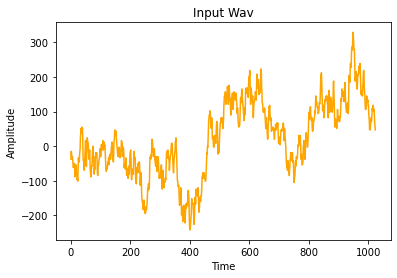

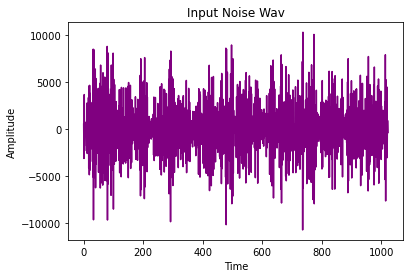

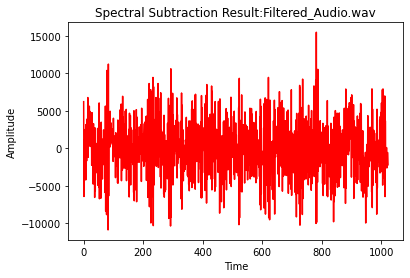

In [4]:

# Spectral Subtraction: Method used for noise reduction 
                      

import numpy as np
import scipy
from scipy import io
from scipy.io import wavfile
import librosa
from scipy.io.wavfile import read
import matplotlib.pyplot as plt

# edit following wav file name
infile='test.wav'
outfile='Filtered_Audio.wav'
noisefile='test_noise.wav'

# load input file, and stft (Short-time Fourier transform)
#print ('load wav', infile)
data, sr = librosa.load( infile, sr=None, mono=True) # keep native sr (sampling rate) and trans into mono
s= librosa.stft(data)    # Short-time Fourier transform
ss= np.abs(s)         # get magnitude
angle= np.angle(s)    # get phase
b=np.exp(1.0j* angle) # use this phase information when Inverse Transform

# load noise only file, stft, and get mean
#print ('load wav', noisefile)
nw, nsr = librosa.load( noisefile, sr=None, mono=True)
ns= librosa.stft(nw)    # Short-time Fourier transform
nss= np.abs(ns)      # get magnitude
mns= np.mean(nss, axis=1) # get mean

# subtract noise spectral mean from input spectral, and istft (Inverse Short-Time Fourier Transform)
sa= ss - mns.reshape((mns.shape[0],1))  # reshape for broadcast to subtract
sa0= sa * b  # apply phase information
y= librosa.istft(sa0) # back to time domain signal

# save as a wav file
scipy.io.wavfile.write(outfile, sr, (y * 32768).astype(np.int16)) # save in WAV format
#librosa.output.write_wav(outfile, y , sr) 
#print ('Que1_part3.wav', outfile)


# Input
input_data = read("test.wav")
audio = input_data[1]
plt.plot(audio[0:1024],color="orange")
# label the axes
plt.ylabel("Amplitude")
plt.xlabel("Time")
# set the title  
plt.title("Input Wav")
# display the plot
plt.show()

# Input noise
input_data = read("test_noise.wav")
audio = input_data[1]
plt.plot(audio[0:1024],color="purple")
# label the axes
plt.ylabel("Amplitude")
plt.xlabel("Time")
# set the title  
plt.title("Input Noise Wav")
# display the plot
plt.show()

# Output
input_data = read("Filtered_Audio.wav")
audio = input_data[1]
plt.plot(audio[0:1024],color="r")
# label the axes
plt.ylabel("Amplitude")
plt.xlabel("Time")
# set the title  

plt.title("Spectral Subtraction Result:Filtered_Audio.wav")
# display the plot
plt.show()